# Assignment 2.2: Supplemantary Material

This notebook provides some additional explanations to the dataset and provides some example code.

In [58]:
import cv2 as cv 
import matplotlib.pyplot as plt
import torch
from torch import nn

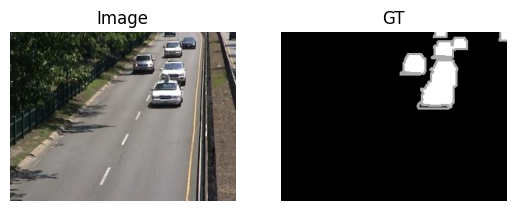

In [59]:
# Extract Color Images
img = cv.imread("highway/input/in001600.jpg")[:,:,::-1]
# Extract corresponding groundthruth image
label = cv.imread("highway/groundtruth/gt001600.png",0)
        
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(label, cmap="gray")
plt.axis("off")
plt.title("GT")
plt.show()

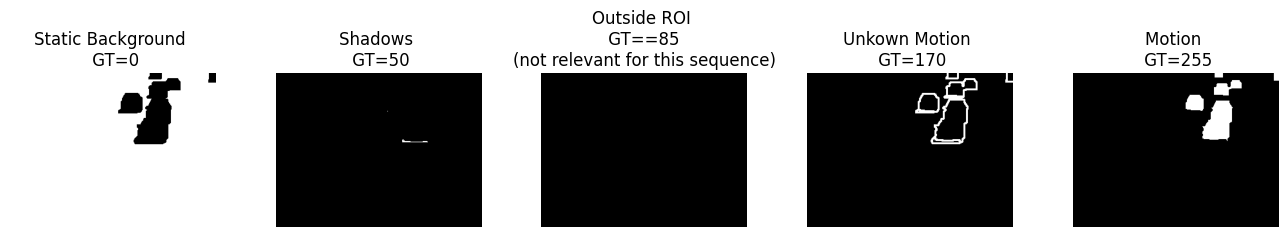

In [60]:

plt.figure(figsize=(20,2))
plt.subplot(1, 6, 1)
plt.imshow(label==0,cmap="gray")
plt.axis("off")
plt.title("Static Background \n GT=0")

plt.subplot(1, 6, 2)
plt.imshow(label==50, cmap="gray")
plt.axis("off")
plt.title("Shadows \n GT=50")

plt.subplot(1, 6, 3)
plt.imshow(label==85, cmap="gray")
plt.axis("off")
plt.title("Outside ROI \n GT==85 \n(not relevant for this sequence)")


plt.subplot(1, 6, 4)
plt.imshow(label==170, cmap="gray")
plt.axis("off")
plt.title("Unkown Motion \n GT=170")

plt.subplot(1, 6, 5)
plt.imshow(label==255, cmap="gray")
plt.axis("off")
plt.title("Motion \n GT=255")
plt.show()

# Turn labels into binary mask

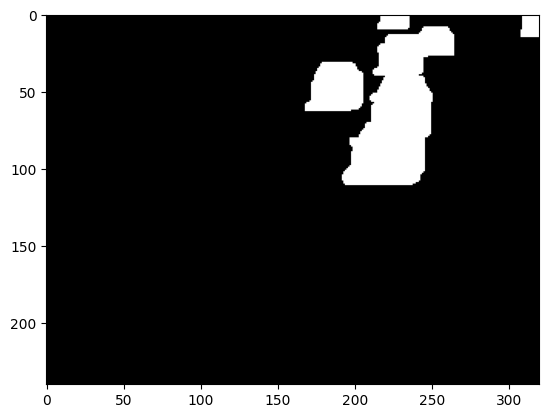

In [61]:
label = label > 0 
gt = torch.tensor(label, dtype = torch.long)
plt.imshow(gt, cmap="gray")
plt.show()

# Pixel-wise Cross Entropy

Our model should provide a pixel-wise classification. 
The model outputs a tensor of size $(B \times C \times H \times W)$, where:
- B: Batch size
- C: Number of classes 
- H: image height
- W: image width

The model outputs a probability/logits for each class and pixel.  

We can use Cross Entropy as our loss function.  
The groundtruth label should have size: $(B \times H \times W)$ where each pixel is an integer/long value describing the class:

In [62]:
loss = nn.CrossEntropyLoss()

# randomly generated output 
B,C,H,W = 1, 2, 240, 320
output = torch.rand(B,C,H,W, requires_grad=True)

# Use previous label and add batch dimension
gt = gt.unsqueeze(0)
E = loss(output, gt)
E.backward()
E

tensor(0.7131, grad_fn=<NllLoss2DBackward0>)